# <span style="color:#6978F7">Code Book Modelling Sandbox</span>

The Code Book Modelling Sandbox is focused on solving 2 sets of problems: 
<br>    1) assist users in a simpler way to access complex Refinitiv data structures;
<br>    2) provide off the shelf blocks for analytics related to different asset classes.

This package contains the following libraries:
- [BASIC] Universal chain resolver
- [BASIC] Bond metadata loader
- [FIXED INCOME] Yield map charting
- [FIXED INCOME] 3D yield surface chart
- [FIXED INCOME] Bond portfolio calculations
- [COMMODITIES] Commodity forward curve analysis
- [COMMODITIES] Commodity futures seasonality (intra-month interval, non-continuous futures)
- [FX/MM] FX Hedging Value-at-Risk impact analysis
- [FX/MM] FX Cross-rate relative value analysis
- [QUANT] Time series forecasting with standard normal distribution limits
- [QUANT] Time series forecasting using the ARIMA model
- [SHIPPING] Vessel tracking
- [FIXED INCOME / QUANT] Yield curve principal component analysis
- [FIXED INCOME] Yield curve shift analysis

The below cells contain references and sample calls to the included modules.

In [7]:
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline

import ipynb.fs.full.chain_expander as chain
import ipynb.fs.full.bond_metadata as bond

import ipynb.fs.full.ymap_charts as ymap
import ipynb.fs.full.yield_surf as yield_surf
import ipynb.fs.full.cmdty_fwd_curve as cmdty_fwd_curve
import ipynb.fs.full.cmdty_seasonality as cmdty_seasonality
import ipynb.fs.full.bond_portfolio_analytics as bond_portfolio_analytics
import ipynb.fs.full.fx_hedge_var_impact as fx_hedge_var_impact
import ipynb.fs.full.vessel_monitor as vessel_monitor
import ipynb.fs.full.series_forecast as series_forecast
import ipynb.fs.full.arima_forecast as arima_forecast
import ipynb.fs.full.pca_yield_curve as pca_yield_curve
import ipynb.fs.full.fx_cross_relative_value as fx_cross_relative_value
import ipynb.fs.full.rf_yield_curve as rf_yield_curve_analysis

import refinitiv.data as rd
rd.open_session()

<refinitiv.data.session.Definition object at 0x7f938b03f430 {name='codebook'}>

### <span style="color:#6978F7">Universal chain resolver</span>

RIC chains are dynamic lists that are maintained by Refinitiv and would usually contain sets of related instruments like futures contracts, deposits, swaps and more with a similar (if not the same) underlying instrument type. A few examples of RIC chains are: 
- 0#LCO: - Brent futures
- EURFWD= - EUR/USD FX forward curve
- 0#USGVUSACRBMK= - US sovereign CDS curve
- 0#GBBMK= - GB benchmark treasuries curve

One of the main problems of working with multiple asset types is the difference in data fields for different RIC types. Some instruments would have prices on fields like PRIMACT_1, others on BID, which means that the consumer has to be aware of these differences. <b>chain_expander</b> is a module that was designed to assist users in handling these differences and expanding RIC chains automatically just by feeding the chain code into the main function.

df = <b>chain_expander.<span style=" color:green">get_data</span></b><i>(ric_chain, at_date = '', chain_type = '')</i>
<br>Returns values in a pandas.DataFrame.</br>

|<p align="left">Parameter</p>| Description | Possible arguments |
|----|----|-----|
|<p align="left"><b>ric_chain</b></p>| String value containing the name of the RIC chain.| Any RIC chain, e.g. 'USDIRS' or '0#EUBMK='|
|<p align="left"><b>at_date</b></p>| Optional: retreive expand chain with historical market data - in development. |N/A|
|<p align="left"><b>chain_type</b></p>| Optional: specify the chain type in case the type of instruments is known. This will speed up the code execution, as the method will not need to run a secondary check for asset type classification.|'zero': zero curve <br>'bond': bonds</br> <br>'fx forward': FX forward contracts</br> <br>'option': options</br> <br>'futures': commodity futures</br> <br>'ir futures': interest rate futures</br> <br>'cds': credit default swaps</br> <br>'irs': interest rate swaps</br> <br>'commodity': commodity chains (in development)</br> <br>'deposit': deposit curve</br> <br>'fra': forward rate agreements</br> <br>'ibor': interbank interest rate fixings</br> <br>'credit': Refinitiv pre-calculated credit curves</br> <br>'fx spot ric': single-name spot currency rate (even though this is not a chain, the method will return bid/offer by default).</br>|

Most RIC chains can be expanded with the native eikon.get_data() method, however the the chain_expander module will not only retreive the RICs, but also pull relevant market & metadata. For example, the function will return strikes, option type and implied volatilities for option chains whereas bond chains will be expanded with ISINs, coupon rates, maturities, adfin structures and more.

In [8]:
response = chain.get_data('0#USBMK=')
response

,ric,isin,maturity,coupon,currency,bond_structure,rate_structure,structure,description,seniority,...,putable,callable,sinkable,is_benchmark,bid_yield,ask_yield,yield,tenor,bid,ask
0,US1MT=RR,US912797FY81,2023-07-18,0.0,USD,ACC:A0 CFADJ:NO CLDR:USA_FI DMC:F EMC:S FRQ:2 ...,CLDRADJ:NO DCB:A0 EY:2 LLP:NO RATEFRQ:2 RATETY...,ACC:A0 CFADJ:NO CLDR:USA_FI DMC:F EMC:S FRQ:2 ...,UST Bill 07/18/23,UN,...,N,N,N,Y,0.05112,0.050915,0.05112,0.072480,0.0501,0.0499
1,US2MT=RR,US912797GG66,2023-08-15,0.0,USD,ACC:A0 CFADJ:NO CLDR:USA_FI DMC:F EMC:S FRQ:2 ...,CLDRADJ:NO DCB:A0 EY:2 LLP:NO RATEFRQ:2 RATETY...,ACC:A0 CFADJ:NO CLDR:USA_FI DMC:F EMC:S FRQ:2 ...,UST Bill 08/15/23,UN,...,N,N,N,Y,0.052043,0.051837,0.052043,0.149192,0.0508,0.0506
2,US3MT=RR,US912796CR84,2023-09-21,0.0,USD,ACC:A0 CFADJ:NO CLDR:USA_FI DMC:F EMC:S FRQ:2 ...,CLDRADJ:NO DCB:A0 EY:2 LLP:NO RATEFRQ:2 RATETY...,ACC:A0 CFADJ:NO CLDR:USA_FI DMC:F EMC:S FRQ:2 ...,UST Bill 09/21/23,UN,...,N,N,N,Y,0.052945,0.052892,0.052945,0.250562,0.0514,0.05135
3,US4MT=RR,US912797HB60,2023-10-17,0.0,USD,ACC:A0 CFADJ:NO CLDR:USA_FI DMC:F EMC:S FRQ:2 ...,CLDRADJ:NO DCB:A0 EY:2 LLP:NO RATEFRQ:2 RATETY...,ACC:A0 CFADJ:NO CLDR:USA_FI DMC:F EMC:S FRQ:2 ...,UST Bill 10/17/23,UN,...,N,N,N,Y,0.053565,0.053302,0.053565,0.321795,0.0518,0.05155
4,US6MT=RR,US912797FV43,2023-12-21,0.0,USD,ACC:A0 CFADJ:NO CLDR:USA_FI DMC:F EMC:S FRQ:2 ...,CLDRADJ:NO DCB:A0 EY:2 LLP:NO RATEFRQ:2 RATETY...,ACC:A0 CFADJ:NO CLDR:USA_FI DMC:F EMC:S FRQ:2 ...,UST Bill 12/21/23 When Iss,UN,...,N,N,N,Y,0.054187,0.053919,0.054187,0.499877,0.0519,0.05165
5,US1YT=RR,US912797FS14,2024-06-13,0.0,USD,ACC:A0 CFADJ:NO CLDR:USA_FI DMC:F EMC:S FRQ:2 ...,CLDRADJ:NO DCB:A0 EY:2 LLP:NO RATEFRQ:2 RATETY...,ACC:A0 CFADJ:NO CLDR:USA_FI DMC:F EMC:S FRQ:2 ...,UST Bill 06/13/24,UN,...,N,N,N,Y,0.052669,0.05234,0.052669,0.979329,0.049875,0.049575
6,US2YT=RR,US91282CHD65,2025-05-31,0.0425,USD,ACC:AA CCM:BBAA CFADJ:NO CLDR:USA_FI DATED:31M...,CLDRADJ:NO DCB:AA EY:2 LLP:NO RATEFRQ:FRQ RATE...,ACC:AA CCM:BBAA CFADJ:NO CLDR:USA_FI DATED:31M...,UST 4.250 05/31/25,UN,...,N,N,N,Y,0.047259,0.047238,0.047259,1.943713,0.99125,0.991289
7,US3YT=RR,US91282CHH79,2026-06-15,0.04125,USD,ACC:AA CCM:BBAA CFADJ:NO CLDR:USA_FI DATED:15J...,CLDRADJ:NO DCB:AA EY:2 LLP:NO RATEFRQ:FRQ RATE...,ACC:AA CCM:BBAA CFADJ:NO CLDR:USA_FI DATED:15J...,UST 4.125 06/15/26,UN,...,N,N,N,Y,0.043165,0.043137,0.043165,2.984809,0.994687,0.994766
8,US5YT=RR,US91282CHE49,2028-05-31,0.03625,USD,ACC:AA CCM:BBAA CFADJ:NO CLDR:USA_FI DATED:31M...,CLDRADJ:NO DCB:AA EY:2 LLP:NO RATEFRQ:FRQ RATE...,ACC:AA CCM:BBAA CFADJ:NO CLDR:USA_FI DATED:31M...,UST 3.625 05/31/28,UN,...,N,N,N,Y,0.03985,0.039832,0.03985,4.946452,0.983984,0.984062
9,US7YT=RR,US91282CHF14,2030-05-31,0.0375,USD,ACC:AA CCM:BBAA CFADJ:NO CLDR:USA_FI DATED:31M...,CLDRADJ:NO DCB:AA EY:2 LLP:NO RATEFRQ:FRQ RATE...,ACC:AA CCM:BBAA CFADJ:NO CLDR:USA_FI DATED:31M...,UST 3.750 05/31/30,UN,...,N,N,N,Y,0.03874,0.038714,0.03874,6.946452,0.9925,0.992656


### <span style="color:#6978F7">Bond metadata loader</span>

This method is very similar to <b>chain_expander</b>, however the only differences are that this method was the designed only to work with bond data, and it works with an arbitrary list of bonds, rather than a RIC chain.

df = <b>bond_metadata.<span style=" color:green">get_data</span></b><i>(ric_list, at_date = '')</i>
<br>Returns values in a pandas.DataFrame.</br>

|<p align="left">Parameter</p>| Description | Possible arguments |
|----|----|----|
|<p align="left"><b>ric_list</b></p>| A list of single-name RICs as string values. | eg. ['EU2YT=RR', '459200AR2=']|
|<p align="left"><b>at_date</b></p>| Optional: retreive expand chain with historical market data - in development. |N/A|

In [9]:
bond_data = bond.get_data(['EU2YT=RR', '459200AR2='], '')
bond_data

,ric,isin,maturity,coupon,currency,bond_structure,rate_structure,structure,description,seniority,...,is_benchmark,is_perpetual,call_date,bid_yield,ask_yield,yield,tenor,quotation_method,bid,ask
0,EU2YT=RR,DE000BU22007,2025-03-13,0.025,EUR,ACC:AA CCM:BBAA CFADJ:NO CLDR:EMU_FI DATED:02F...,CLDRADJ:NO DCB:AA EY:1 LLP:AA RATEFRQ:FRQ RATE...,ACC:AA CCM:BBAA CFADJ:NO CLDR:EMU_FI DATED:02F...,DEGV 2.500 03/13/25,UN,...,Y,N,NaT,0.03174,0.03152,0.03174,1.727274,260,0.98875,0.98911
1,459200AR2=,US459200AR21,2027-08-01,0.0622,USD,ACC:00 CCM:BB00 CFADJ:NO CLDR:USA_FI DATED:01A...,CLDRADJ:NO DCB:00 EY:2 LLP:NO RATEFRQ:FRQ RATE...,ACC:00 CCM:BB00 CFADJ:NO CLDR:USA_FI DATED:01A...,IBM 6.220 08/01/27 PUT,SR,...,N,N,NaT,0.047681,0.047381,0.047681,4.113575,260,1.053501,1.054644


### <span style="color:#6978F7">Yield map charting</span>

This module can be used as a charting utility for a portfolio of bonds. The user is expected to feed a list of RICs into the main function and the module will get data and build yield curves on the supplied portfolio automatically. The output is presented in a scatter plot format. For the user's convenience, an automatic label placement algorithm ensures that the scatter point annotations do not overlap.

<b>ymap_charting.<span style=" color:green">get_data</span></b><i>(ric_list, width = 15, height = 15)</i>
<br>Returns a matplotlib scatter plot.</br>

|<p align="left">Parameter</p>| Description | Possible arguments |
|----|----|----|
|<p align="left"><b>ric_list</b></p>| A regular list object containing bond RICs. | list |
|<p align="left"><b>width</b></p>| Optioinal: set the chart's width. Default value is 15. | int |
|<p align="left"><b>height</b></p>| Optioinal: set the chart's height. Default value is 15. | int |
|<p align="left"><b>enable_fitting</b></p>| Optional: this flag applies curve fitting. Default value is set to True. | boolean |

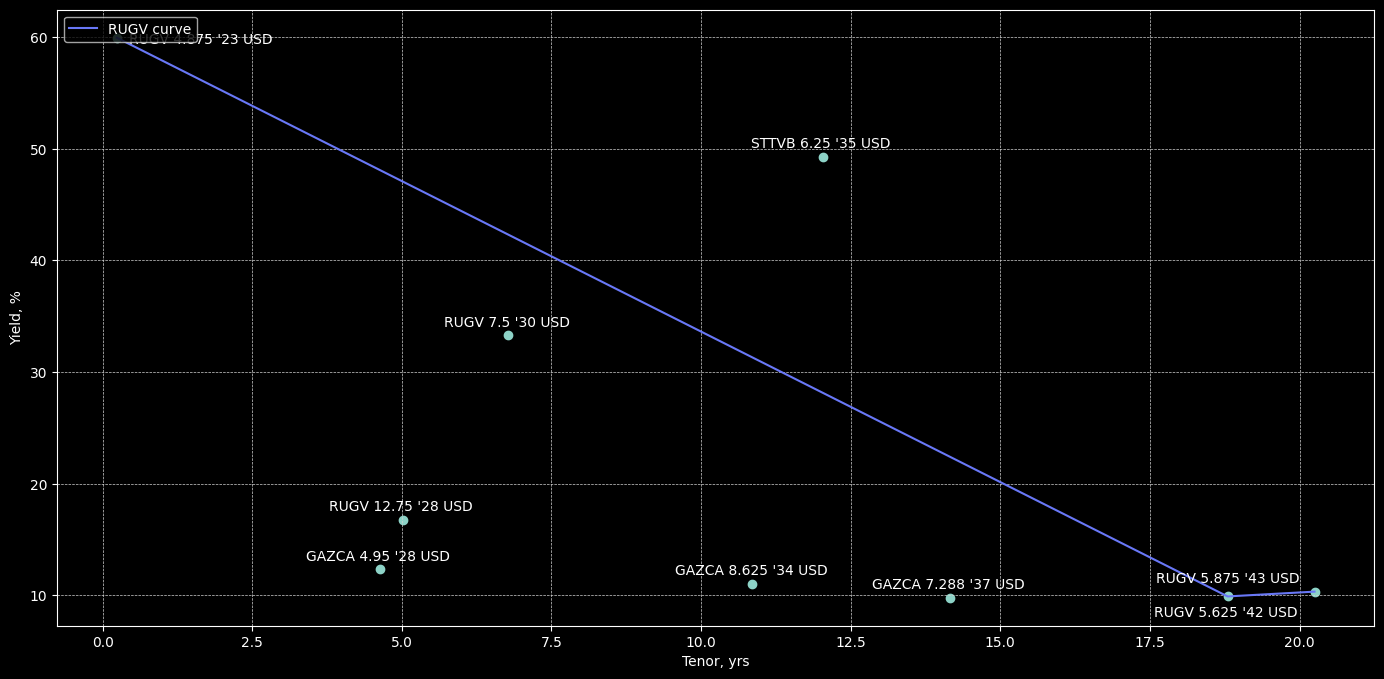

In [10]:
import matplotlib
%matplotlib inline
portfolio2 = ['RU097172196=', 'RU076747385=', 'RU097172145=',  'RU008854319=', 'RU011428878=',
              'RU022371592=', 'RU031652413=', 'RU019175472=',   'RU088573692=']
ymap.get_data(portfolio2, height=8, width=17, enable_fitting=False)

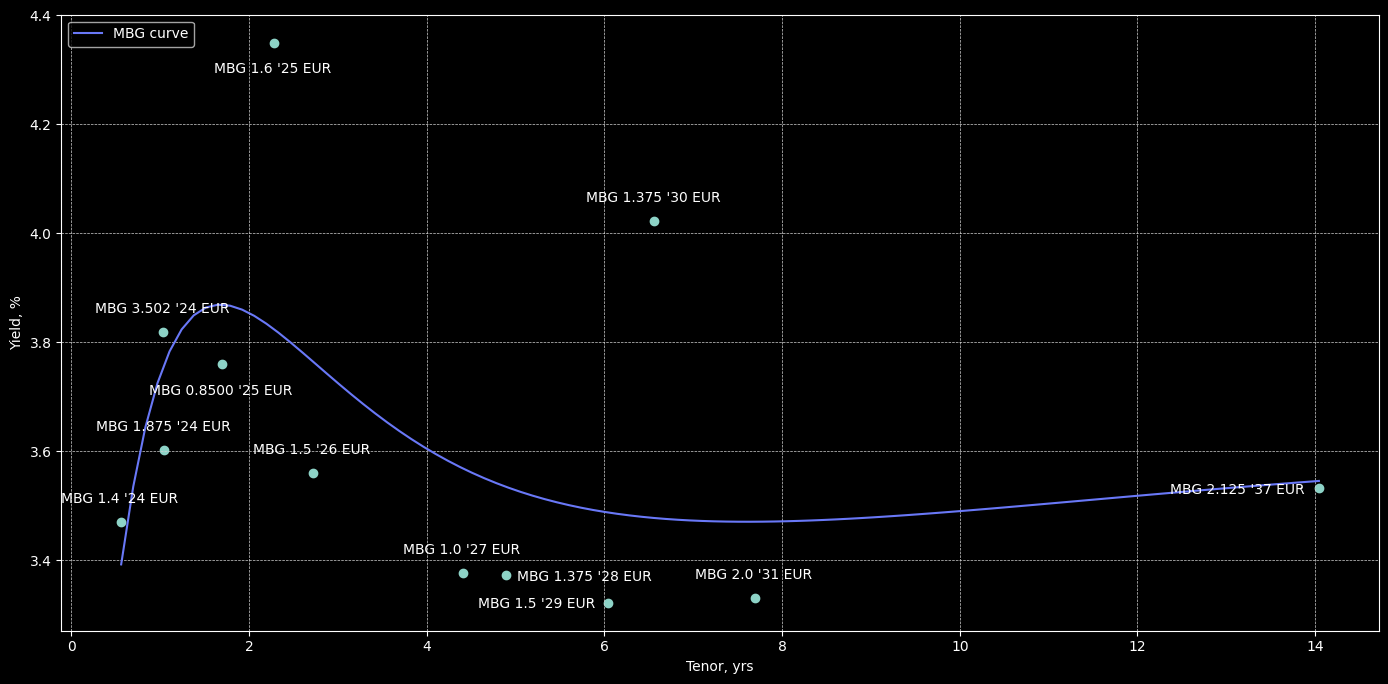

In [11]:
automobiles_port = ['DE107802886=', 'XS1965335679=TE', 'DE137669226=', 'DE085720546=',
                    'DE131657129=', 'DE097608377=', 'XS1984518867=TE', 'DE140844403=', 'DE000A1R04Y=1M', 'DEA169G0=',
                    'DE094671949=', 'DE102131819=', 'DE082784624=', 'DE089998948=', 'DE140844420=', 'DE134271175=',
                    'DE164068196=', 'DE108494891=', 'DE157212117=', 'DE129441461=', 'DE137669609=', 'DE171715431=',
                    'DE140844438=', 'DE164068382=', 'DE155016957=', 'DE195743975=', 'DE164068331=']
ymap.get_data(automobiles_port, height=8, width=17, enable_fitting=True)

### <span style="color:#6978F7">Bond portfolio analytics</span>

This is a module that demonstrates the usage of Refinitiv cloud based FI analytics.

<b>bond_portfolio_analytics.<span style=" color:green">get_data</span></b><i>(rics, position_amounts)</i>
<br>Returns a dictionary with portfolio z-spread, modified duration and convexity.</br>

In [12]:
bond_rics = ['DE2YT=RR', 'DE5YT=RR', 'DE7YT=RR']
position = [12190996, 1058922, 466161]
bond_portfolio_analytics.get_data(bond_rics, position)

{'z-spread': -71.07140522399214,
 'modified duration': 2.0247349334237574,
 'convexity': 7.403299667842391}

### <span style="color:#6978F7">3D yield surface</span>

This function builds a yield surface from a RIC chain.

<b>yield_surf.<span style=" color:green">get_data</span></b><i>(ric_chain)</i>
<br>Returns a plotly surface chart.</br>

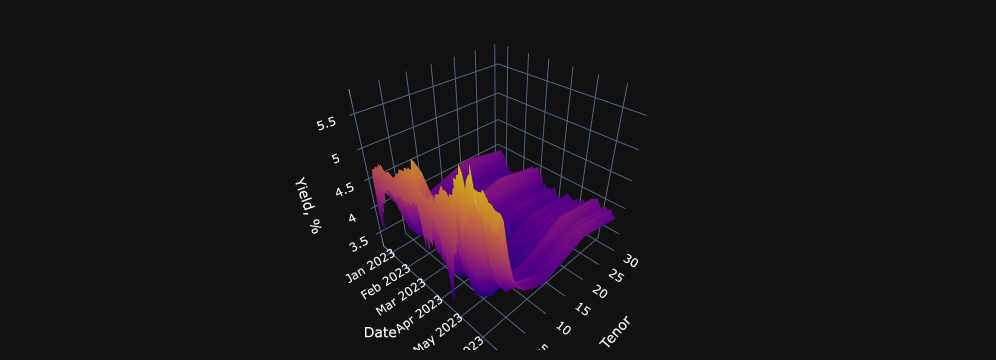

In [13]:
yield_surf.get_data('0#USBMK=')

### <span style="color:#6978F7">Commodities forward curve analysis</span>

The commodities forward curve analysis module allows the user to specify custom underlyings for the forward term structure and perform a retrospective comparison of the curve's evolution against a spot contract's dynamic.

<b>cmdty_fwd_curve.<span style=" color:green">get_data</span></b><i>(spot_ric, forward_curve, dates = calculation_dates)</i>
<br>Returns a matplotlib chart.</br>

|<p align="left">Parameter</p>| Description | Possible arguments |
|----|----|----|
|<p align="left"><b>spot_ric</b></p>| A spot contract RIC. | string |
|<p align="left"><b>forward_curve</b></p>| Either a futures RIC chain, a custom list of RICs or a dictionary containing tenors and corresponding RICs.  | string, e.g. '0#LCO:' <br> dictionary, e.g. {'1M':'RBc1', '2M':'RBc2'} </br> <br> list, e.g. ['LCOCALMc18','LCOCALMc24','BFSM012']</br>|
|<p align="left"><b>dates</b></p>| List of calculation dates for curve building given as 'yyyy-mm-dd'. | string |
|<p align="left"><b>num_contracts</b></p>| Optional: in case the forward curve is a futures RIC chain, this parameter can be used to control the number of contracts that will be used for building the curve. | int |

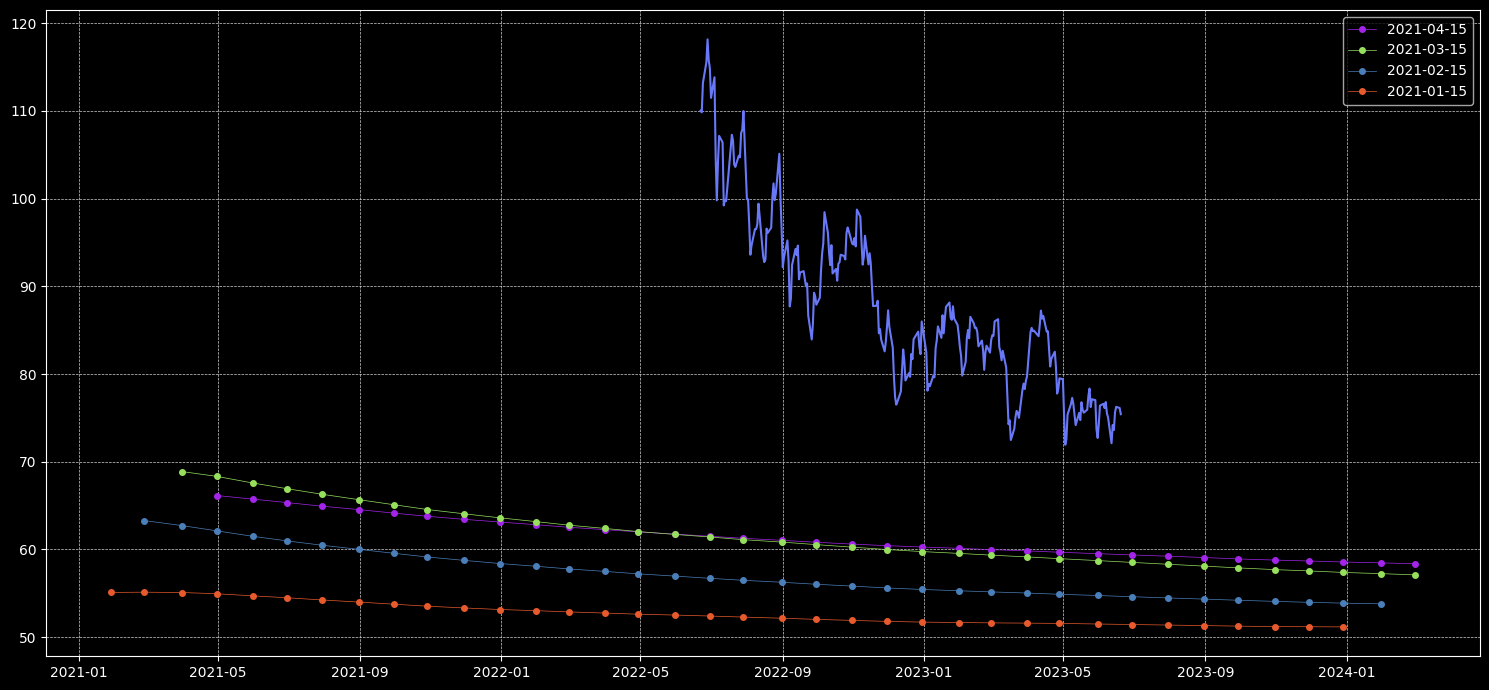

In [14]:
dates = ['2021-04-15', '2021-03-15', '2021-02-15', '2021-01-15']
cmdty_fwd_curve.get_data('LCOc1', '0#LCO:', dates=dates, num_contracts=36)

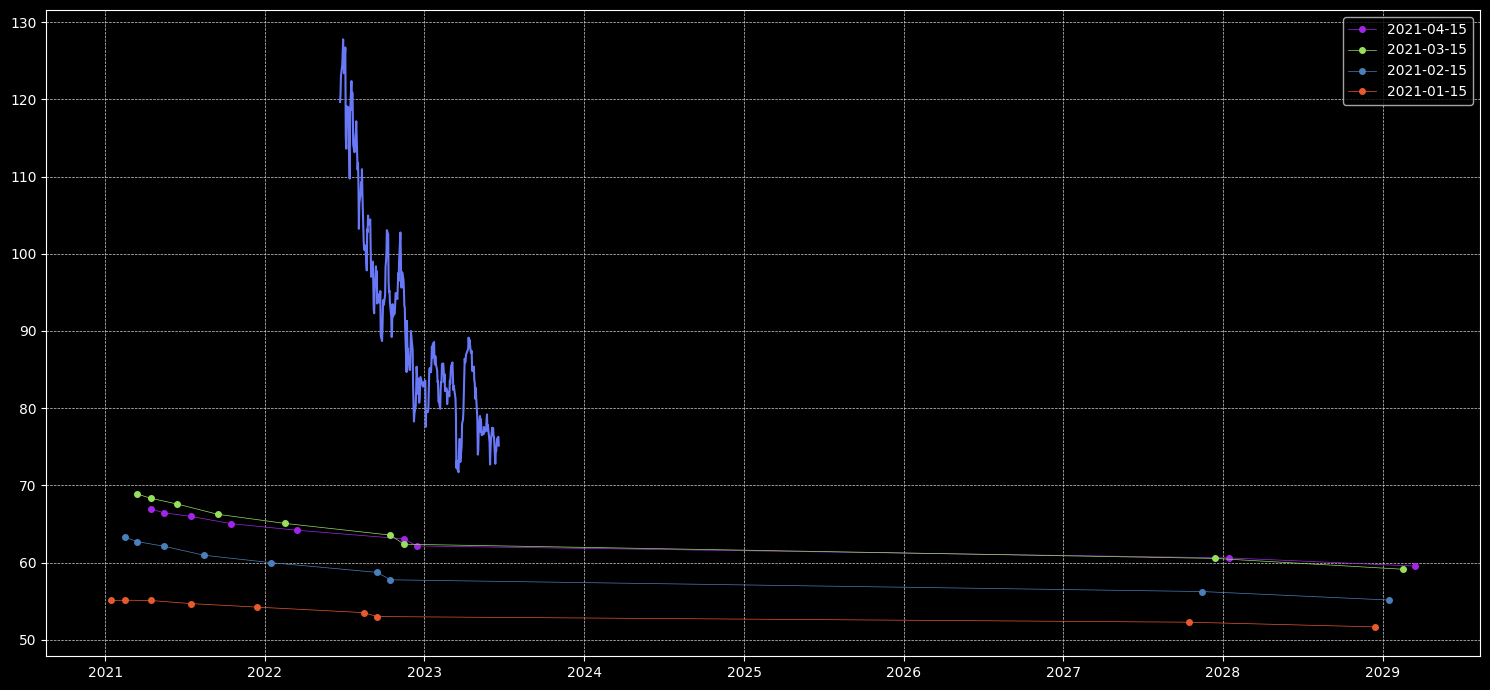

In [17]:
my_curve = ['LCOc1', 'LCOc2', 'LCOc3', 'LCOCALMc4', 'LCOCALMc6',
            'LCOCALMc9', 'LCOCALMc12', 'LCOCALMc18', 'LCOCALMc24']
dates = ['2021-04-15', '2021-03-15', '2021-02-15', '2021-01-15']
cmdty_fwd_curve.get_data('BRT-', my_curve, dates=dates)

### <span style="color:#6978F7">Commodities intra-month seasonality chart</span>

This module allows the user to plot a seasonality chart by specifying the futures contract RIC, number of years to look back and the required month.

<b>cmdty_seasonality.<span style=" color:green">get_data</span></b><i>(ric, number_of_years, month = int)</i>
<br>Returns a plotly chart.</br>

|<p align="left">Parameter</p>| Description | Possible arguments |
|----|----|----|
|<p align="left"><b>ric</b></p>| A futures contract RIC. | string |
|<p align="left"><b>number_of_years</b></p>| Determines the number of years that the method will look back for seasonality.  | int |
|<p align="left"><b>month</b></p>| Choose the month number. | int |

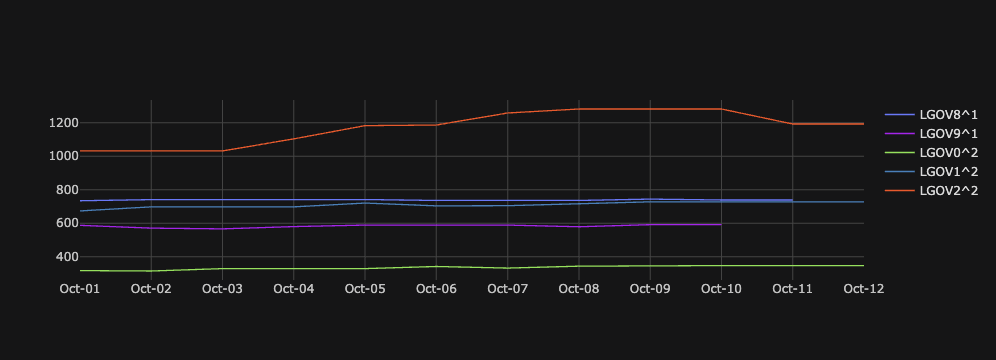

,LGOV8^1,LGOV9^1,LGOV0^2,LGOV1^2,LGOV2^2
Dates,,,,,
Oct-01,734.00,587.25,317.00,673.25,1031.25
Oct-02,740.75,570.50,314.75,697.50,1031.25
Oct-03,740.75,566.25,329.00,697.50,1031.25
Oct-04,743.25,579.75,329.00,697.50,1103.25
Oct-05,741.25,588.75,329.00,720.25,1182.25
Oct-06,735.75,588.75,341.75,703.50,1185.75
Oct-07,735.75,588.75,332.25,704.50,1257.75
Oct-08,735.75,578.75,343.50,716.75,1281.50
Oct-09,743.75,591.25,347.00,727.50,1281.50


In [19]:
ric = 'LGOc1'
num_years = 5
mm = 10
df = cmdty_seasonality.get_data(ric, num_years, mm)
df

### <span style="color:#6978F7">FX hedging impact on Value-at-Risk analysis</span>

This model calculates a parametric VaR on an FX portfolio, and measures the changes in risk depending on % of FX positions being hedged.

<b>fx_hedge_var_impact.<span style=" color:green">get_data</span></b><i>(portfolio)</i>
<br>Returns a plotly chart.</br>

The portfolio is to be declared as a dictionary of the following structure: <b><i>{str currency RIC : [position amt, % of position hedged] }</i></b>


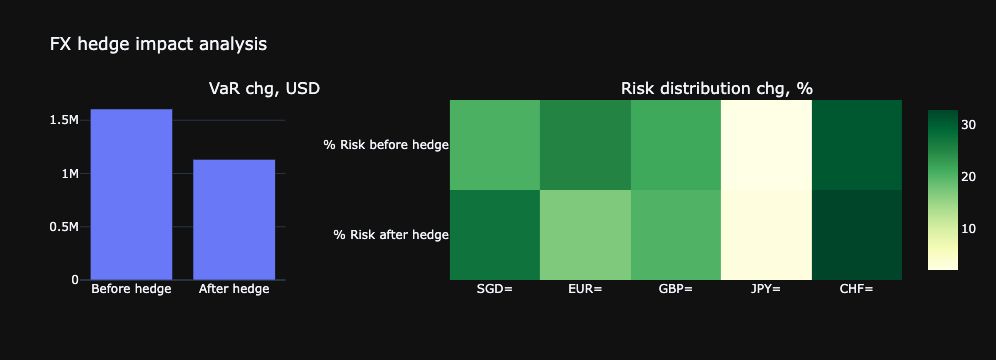

In [20]:
portfolio = {
    'SGD=': [10000000, 0],
    'EUR=': [10000000, 0.5],
    'GBP=': [10000000, 0.3],
    'JPY=': [100000000, 0],
    'CHF=': [10000000, 0.2]
}
fx_hedge_var_impact.get_data(portfolio)

### <span style="color:#6978F7">Vessel monitor</span>

The module supports tracking changes in vessel movement on a user-defined list vessels by RIC or IMO code.

<b>vessel_monitor.<span style=" color:green">get_data</span></b><i>(imo_list, start_date, geographical_scope)</i>
<br>Returns a plotly chart.</br>

In [ ]:
imo_list = ["9259343", "9681699"]
start_date = '2022-09-01'
vessel_data = vessel_monitor.get_data(imo_list=imo_list, start_date=start_date)

### <span style="color:#6978F7">Time series forecast</span>

This model builds a forecast based on the drift of a historical time series and plots the distribution limits at a user-defined confidence interval.

<b>series_forecast.<span style=" color:green">get_data</span></b><i>(instrument, confidence_interval)</i>
<br>Returns a plotly chart.</br>

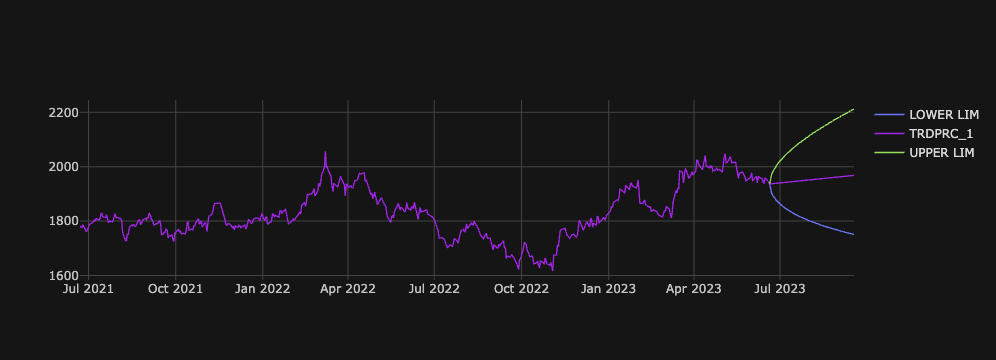

In [16]:
series_forecast.get_data(instrument='GCc1', confidence_interval=0.9)

### <span style="color:#6978F7">Time series forecast with ARIMA model</span>

This module builds an autoregressive moving average based on time series for short term series forecast. 

<b>arima_forecast.<span style=" color:green">get_data</span></b><i>(ric, start_date)</i>
<br>Returns a matplotlib chart and a Pandas dataframe containing the predicted values.</br>

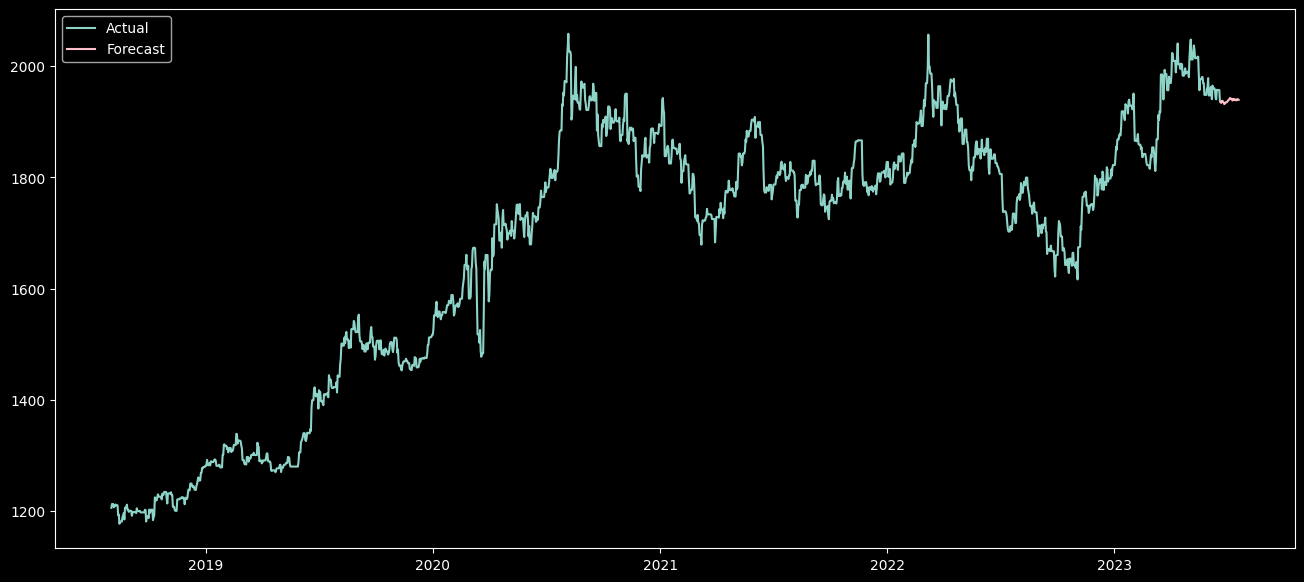

,TRDPRC_1
2023-06-21,1935.614002
2023-06-22,1933.908752
2023-06-23,1937.352157
2023-06-24,1937.889316
2023-06-25,1935.779693
2023-06-26,1934.700056
2023-06-27,1931.742207
2023-06-28,1933.207478
2023-06-29,1934.925394
2023-06-30,1934.835032


In [17]:
arima_forecast.get_data('GCc1', '2018-08-01')

### <span style="color:#6978F7">Yield curve principal component analysis</span>

The pca_yield_curve module performs the PCA decomposition of a defined list of rates instruments (e.g. treasuries or IR swaps) and models the expected mean reversion on a curve trade. Additionally this model runs a Monte Carlo simulation using an Ornstein-Uhlenbeck process to determine the strategy's optimal horizon period.

<b>pca_yield_curve.<span style=" color:green">get_data</span></b><i>(instruments, strategy, trade)</i>
<br>The function returns a pandas dataframe containing the strategy residual in bps, mean reversion and 2x standard deviation limits; the optimal holding period print as well as a plotly chart displaying the dataframe series.</br>

|<p align="left">Parameter</p>| Description | Possible arguments |
|----|----|----|
|<p align="left"><b>instruments</b></p>| A list of RICs. | list, e.g. ['US2YT=RR', 'US5YT=RR'] |
|<p align="left"><b>strategy</b></p>| This parameted should contain the tenors that participate in the trade. | string, e.g. '5-7-15' or '5-10'|
|<p align="left"><b>trade</b></p>| The name of the curve trade. There are 2 values supported: 'butterfly' and 'spread' (in case of 2 instruments). | string |

Optimal holding period (days): 52.8
Horizon date: 2023-08-13


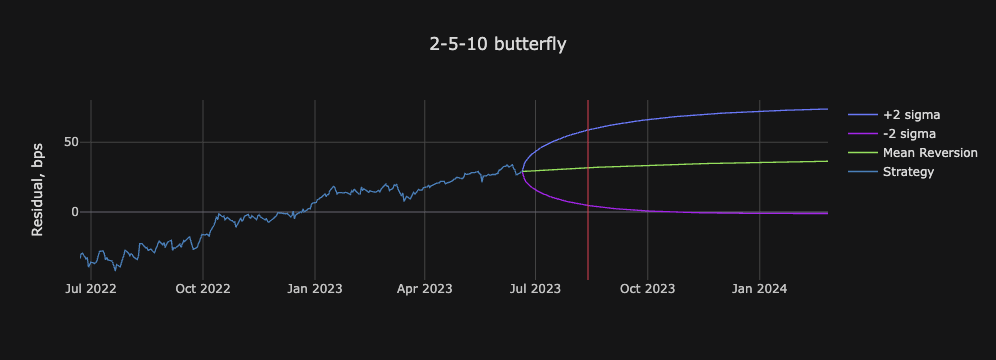

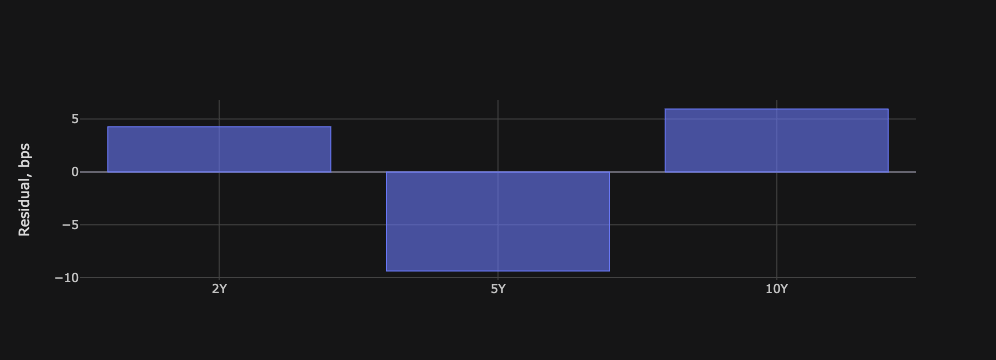

In [18]:
inst = ['DE2YT=RR', 'DE5YT=RR', 'DE10YT=RR']
strategy = '2-5-10'
trade = 'butterfly'
df = pca_yield_curve.get_data(instruments=inst, strategy=strategy, trade=trade)

### <span style="color:#6978F7">Currency relative strength</span>

This module builds applies statistical methods to help the user determine the relative value and potential performance of given cross-FX pairs based on their deviation from the mean, and visualize the correlation with a defined base currency.

<b>fx_cross_relative_value.<span style=" color:green">get_data</span></b><i>(fx_list, base_currency)</i>
<br>The function returns a pandas dataframe containing the z-scores and correlations of the cross-currency pairs, as well as a plotly scatter plot.</br>


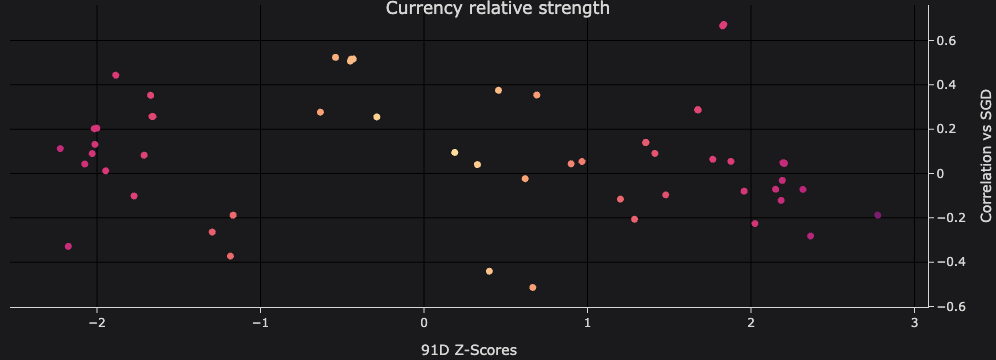

In [19]:
fx_list = ['SAR', 'INR', 'RUB', 'ZAR', 'TRY',
           'AED', 'BRL', 'MXN', 'CNH', 'IDR', 'MYR']
base_currency = 'SGD'

df = fx_cross_relative_value.get_data(fx_list, base_currency)

### <span style="color:#6978F7">Yield curve shift analysis</span>

This model displays a bar chart with 1M / 3M / 6M / 9M %-changes in a given yield curve. The user needs to enter a RIC chain of the required curve.

<b>rf_yield_curve_analysis.<span style=" color:green">get_data</span></b><i>(ric_chain, show_chart=True)</i>
<br>The function returns a pandas dataframe containing curve changes, as well as a plotly bar chart.</br>


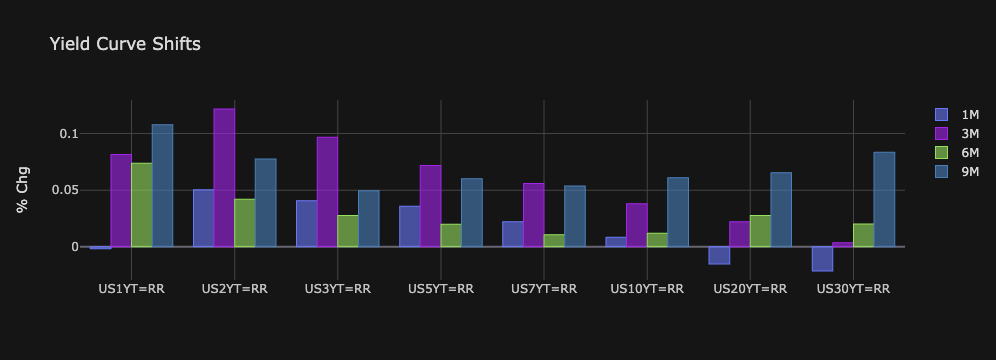

,1M,3M,6M,9M
B_YLD_1,,,,
US1YT=RR,-0.001905,0.081527,0.07377,0.107822
US2YT=RR,0.050302,0.121777,0.041916,0.077523
US3YT=RR,0.040717,0.096807,0.027519,0.049365
US5YT=RR,0.035854,0.071757,0.01984,0.059989
US7YT=RR,0.022074,0.055769,0.010518,0.053743
US10YT=RR,0.008387,0.037872,0.011947,0.060917
US20YT=RR,-0.015248,0.02195,0.027457,0.06546
US30YT=RR,-0.021533,0.003417,0.020043,0.083452


In [20]:
rf_yield_curve_analysis.get_data('0#USBMK=')

In [19]:
rd.close_session()